# линейная реграессия, разбор блокнота Луиса Серрано

In [34]:
from matplotlib import pyplot as plt
import numpy as np
import random

plt.plot() больше подходит для графиков функций

plt.scatter() для построения точек на плосткости

## определение и создание датасета

In [ ]:
features = np.array([1, 2, 3, 5, 6, 7]) # признаки (number of rooms)
labels = np.array([155, 197, 244, 356, 407, 448]) # метки (prices)

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


## нарисуем получившейся датасет

Text(0, 0.5, 'prices')

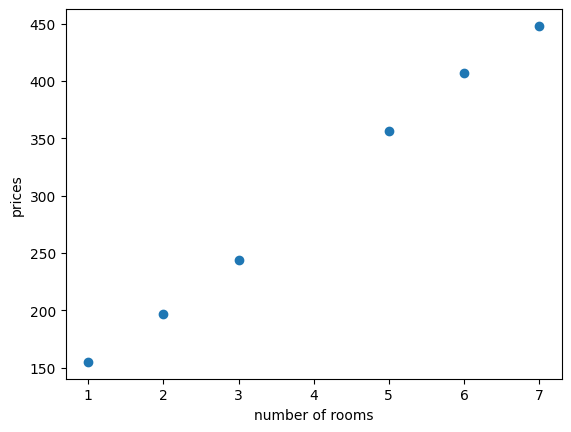

In [36]:
plt.plot(features, labels, 'o')
plt.xlabel('number of rooms')
plt.ylabel('prices')

## функция для обычного приближения прямой к точкам

    разбираем 4 случая:

1) точка выше прямой и справа
2) выше и слева
3) ниже и справа
4) ниже и слева

In [37]:
def simple_trick(base_price, room_price, num_rooms, price):

    predicted_price = base_price + room_price * num_rooms # y = kx + b
    small_1 = random.random() * 0.1
    small_2 = random.random() * 0.1
    
    if price > predicted_price and num_rooms > 0:
        room_price += small_1
        base_price += small_2

    if price > predicted_price and num_rooms < 0:
        room_price -= small_1
        base_price += small_2

    if price < predicted_price and num_rooms > 0:
        room_price -= small_1
        base_price -= small_2

    if price < predicted_price and num_rooms < 0:
        room_price += small_1
        base_price -= small_2

    return room_price, base_price # веса модели


## функция для квадратического приближения прямой к точкам

сводим 4 случая к 1

In [38]:
def square_trick(base_price, room_price, num_rooms, price, learning_rate):

    predicted_price = base_price + room_price * num_rooms # y = kx + b
    
    base_price += learning_rate * (price - predicted_price)
    room_price += learning_rate * (price - predicted_price) * num_rooms
    
    return room_price, base_price # k, b

## функция для абсолютного приближения

промежуточное звено между обычным и квадратическим подходами

сводим 4 к 2

In [39]:
def absolute_trick(base_price, room_price, num_rooms, price, learning_rate):

    predicted_price = base_price + num_rooms * room_price
    
    if price > predicted_price:
        room_price += learning_rate * num_rooms
        base_price += learning_rate
    else:
        room_price -= learning_rate * num_rooms
        base_price -= learning_rate
    
    return room_price, base_price 

# Алгоритм линейной регрессии

многократное повторение алгоритма для приближения прямой к точкам

In [65]:
import random
import matplotlib.pyplot as plt

def linear_regression(features, labels, learning_rate = 0.01, epochs = 10000):
    room_price = random.random()
    base_price = random.random()

    plt.plot(features, labels, 'o')
    plt.xlabel('number of rooms')
    plt.ylabel('prices')
    
    x = np.linspace(features[0], features[-1], 100)

    alpha_ = 0.1

    for epoch in range(epochs):

        # generate random index for slant and y-intersection
        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]
        
        # using square trick
        room_price, base_price = square_trick(
            base_price,
            room_price,
            num_rooms,
            price,
            learning_rate=learning_rate
        )

        if epoch == epochs - 1:
            y = room_price * x + base_price
            plt.plot(x, y, 'k', alpha = 0.8)

        else:
            y = room_price * x + base_price
            plt.plot(x, y, 'gray', alpha = 0.1)
        
    plt.plot(features, labels, 'o')
    
    return room_price, base_price

слудующая строка кода запускает алгоритм линейной регрессии с признаками, метками, скоростью обучения = 0.01, количеством периодов = 10000

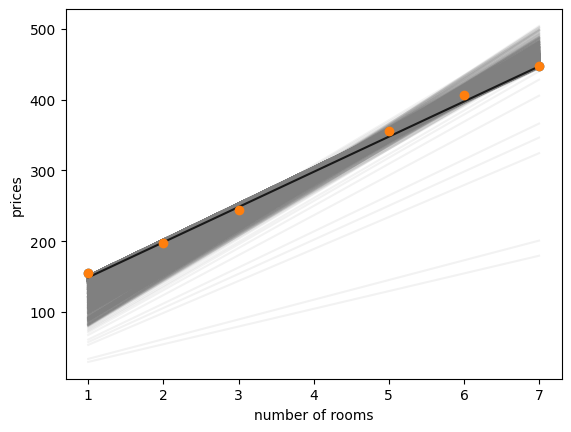

In [66]:
room_price, base_price = linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

## RMSE function

    function for calculate root mean square error

усреднили квадрат ошибок и вычислили из него корень для перехода в нормальные единицы измерения. тип была разница в доллар, получился доллар в квадрате, нужно вернуться к долллару

эта фукнция нужна, чтобы понять, когда целесообразно завершить выполнение алгоритма линейной регрессии: возможно нам хватит 2000 периодов обучения, а не 10000?

In [102]:
def rmse(labels, predictions):
    dif = np.subtract(labels, predictions) # for calculation difference detween prices and predicted prices
    result = np.sqrt(np.dot(dif, dif)/len(labels)) # np.dot for scalar product of vectors
    return result

## The functions for plotting graphs

In [103]:
import matplotlib.pyplot as plt
import numpy as np

def plot_errors(errors):
    plt.scatter(range(len(errors)), errors) # x, y
    plt.xlabel('number of epoch')
    plt.ylabel('RMSE values')
    plt.grid(True, alpha = 0.5) # сетка
    plt.show()

def plot_linear_regression(features, labels, room_price, base_price):
    plt.plot(features, labels, 'o') # 'o' - circles
    plt.xlabel('nummber of rooms')
    plt.ylabel('prices')
    plt.grid(True, alpha = 0.5)

    x = np.linspace(features[0], features[-1], 100)
    y = x * room_price + base_price
    plt.plot(x, y, 'k', alpha = 0.8)
    plt.show()

# The general case of Linear Regression

In [106]:
def linear_regression(features, labels, learning_rate = 0.01, epochs = 10000):
    room_price = random.random()
    base_price = random.random()
    errors = []

    for epoch in range(epochs):
        predictions = room_price * features + base_price
        errors.append(rmse(labels, predictions))

        i = random.randint(0, len(features) - 1)
        num_rooms = features[i]
        price = labels[i]

        room_price, base_price = square_trick(base_price, room_price, num_rooms, price, learning_rate = learning_rate)
    
    plot_errors(errors)
    plot_linear_regression(features = features, labels = labels, room_price = room_price, base_price = base_price)

    return room_price, base_price

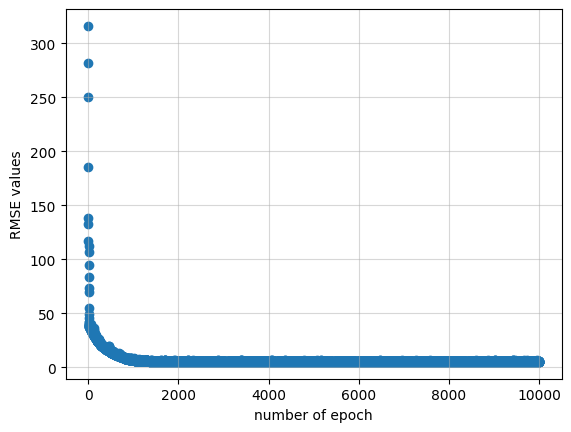

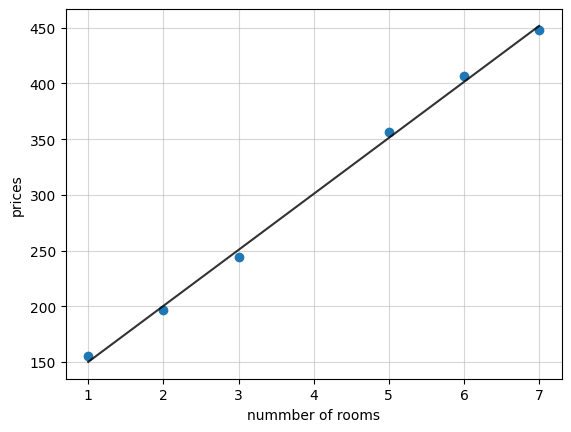

(50.25564768607916, 99.84301151841667)

In [107]:
linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

1 график - ошибки, 2 график - линейная регрессия

1 - этот график показывает изменение RMSE (Root Mean Squared Error — среднеквадратичная ошибка) в зависимости от количества эпох обучения модели линейной регрессии.

## Exercise 3.4

2.3999999999999986 2.3846153846153837 3.0799999999999983 3.076923076923078


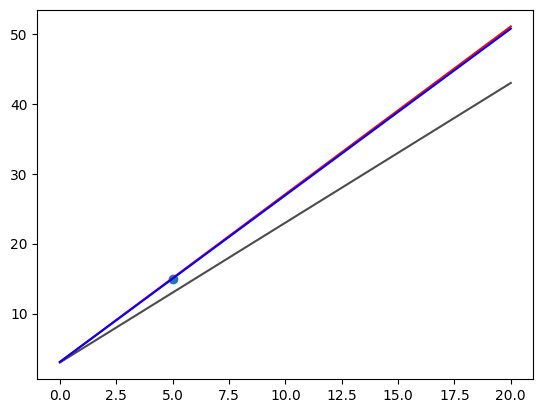

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def abs_trick(x, y, k, b, lr):
    predicted_y = k * x + b

    if y > predicted_y:
        k += x * lr
        b += lr
    else:
        k -= x * lr
        b -= lr

    return k, b

def sqr_trick(x, y, k, b, lr):
    predicted_y = k * x + b
    dif = y - predicted_y

    k += dif * x * lr
    b += dif * lr

    return k, b

def lin_reg(epochs = 100000, lr = 0.01):
    
    k1 = k2 = 2
    b1 = b2 = 3

    y_true = 15
    x_true = 5

    for epoch in range(epochs):
        k1, b1 = abs_trick(x = x_true, y = y_true, k = k1, b = b1, lr = 0.01)
        k2, b2 = sqr_trick(x = x_true, y = y_true, k = k2, b = b2, lr = 0.01)
    
    plt.plot(x_true, y_true, 'o')

    x = np.linspace(0, 20, 100)

    predicted_y = 2 * x + 3
    plt.plot(x, predicted_y, 'k', alpha = 0.7)

    predicted_y = k1 * x + b1
    plt.plot(x, predicted_y, 'red')

    predicted_y = k2 * x + b2
    plt.plot(x, predicted_y, 'blue')
    print(k1, k2, b1, b2)

lin_reg() # the end (:
